In [8]:
import h5py
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np
f = h5py.File('C:\\\\Users\\\\David\\\\Desktop\\\\dcase_5\\\\dcase2018_task5\\\\features\\\\logmel\\\\development.h5', 'r')
dset = f["feature"]
x = np.swapaxes(dset[80],0,1)
print(dset[0])
img = display.specshow(x, y_axis="mel")



OSError: Unable to open file (bad object header version number)

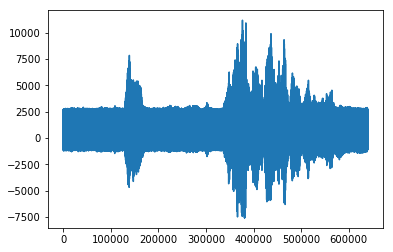

In [ ]:
from pydub import AudioSegment
import sys, wave

path = "C:\\\\Users\\\\David\\\\Desktop\\dcase_5\\\\dcase2018_task5\\\\DCASE2018-task5-dev\\\\audio\\\\DevNode1_ex200_1.wav"
audio = AudioSegment.from_file(path)
# audio = audio.set_channels(1)


s = audio.get_array_of_samples()

# plt.plot(s)

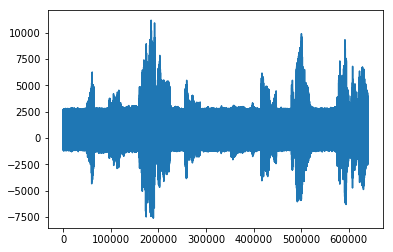

In [ ]:
# halfway_point = len(audio) // 2
# first_half = audio[:halfway_point]

# second_half = audio[halfway_point:]

# combined = second_half + first_half

# s = combined.get_array_of_samples()
import random
cuts = 20

store = []

for i in range(0,cuts):
    seg_len = len(audio) // cuts
    
    if i == 0:
        store.append(audio[0:seg_len])
    else:
        start = seg_len * i
        end = seg_len * (i+1)
        store.append(audio[start:end])

random.shuffle(store)

res = sum(store)

s = res.get_array_of_samples()

# plt.plot(s)

   

                      file_name class_type scene
938  audio/DevNode1_ex156_1.wav      other  s156
social_activity


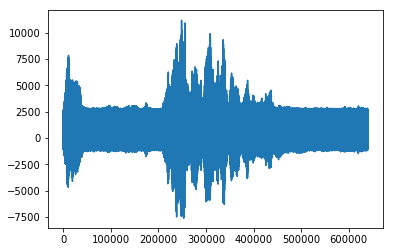

In [40]:
import random 
import pandas as pd
import preprocessor

def get_random_from_class(class_type):
  meta_url = "C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-dev\\meta.txt"
  x = meta_pd[meta_pd["class_type"].str.contains(class_type)]  #print(row["file_name"])
  return x.sample()

def shuffler(file_path, cuts, waveform=True):
    l_class = find_class_from_path(file_path)
    print(l_class)
    audio = AudioSegment.from_file(file_path)
    seg_len = len(audio) // cuts
    audio_container = []
    
    for i in range(0, cuts):
        if i == 0:
          audio_container.append(audio[0:seg_len])
        else:
          start = seg_len * i
          end = seg_len * (i+1)
          audio_container.append(audio[start:end])
         
    random.shuffle(audio_container)
    
    new_res = sum(audio_container)
    if waveform:
      p = new_res.get_array_of_samples()
      plt.plot(p)

    return new_res
  
    
def find_class_from_path(file_path):
  meta_url = "C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-dev\\meta.txt"
  raw_file = file_path.split("\\")[-1]
  location = "audio/" + raw_file
  #print(raw_file)
  meta_pd = pd.read_csv(meta_url, sep="\t", names=["file_name","class_type","scene"])
  x = meta_pd[meta_pd["file_name"].str.contains(location)]  #print(row["file_name"])
  result_class = x.iloc[0]["class_type"]
  return result_class


def get_random_from_class(class_type):
  meta_url = "C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-dev\\meta.txt"
  meta_pd = pd.read_csv(meta_url, sep="\t", names=["file_name","class_type","scene"])
  x = meta_pd[meta_pd["class_type"].str.contains(class_type)]  #print(row["file_name"])

  print(x.sample())
  
get_random_from_class("other")
  
  
  


     # new = None
    # new = sum(order)
    # s. new.get_array_of_samples()
    # plt.plot(s)        
    # print(len(audio_container))  
    # res = random.shuffle(audio_container)
    # audio_result = sum(res)
    # if waveform:
    #     w = audio_result.get_array_of_samples()
    #     plt.plot(w)

x = shuffler(path,5)


In [64]:
from pydub import AudioSegment
import random
meta_url = "C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-dev\\meta.txt"
meta_pd = pd.read_csv(meta_url, sep="\t", names=["file_name","class_type","scene"])

def get_random_from_class(class_type):
  meta_url = "C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-dev\\meta.txt"
  x = meta_pd[meta_pd["class_type"].str.contains(class_type)]  #print(row["file_name"])
  return x.sample()

def find_attributes_from_path(file_path):
  raw_file = file_path.split("\\")[-1]
  location = "audio/" + raw_file
  x = meta_pd[meta_pd["file_name"].str.contains(location)]  #print(row["file_name"])
  result_class = x.iloc[0]["class_type"]
  result_scene = x.iloc[0]["scene"]
  return result_class, result_scene

def mixer(file_path, cuts, waveform=False, mix=2):
  original_file_class, original_file_scene = find_attributes_from_path(file_path)
  original_audio = AudioSegment.from_file(file_path)
  
  seg_len = len(original_audio) // cuts
  original_container = []
  
  for i in range(0, cuts):
    if i == 0:
      original_container.append(original_audio[0:seg_len])
    else:
      start = seg_len * i
      end = seg_len * (i+1)
      original_container.append(original_audio[start:end])
  random.shuffle(original_container)
  sample_container = []
  sample_row = get_random_from_class(original_file_class)
  sample_file = str(sample_row.iloc[0]["file_name"].split("/")[-1])
  sample_path = "C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-dev\\audio\\" + sample_file
  #print(sample_path)
  #print(random.randint(0,cuts-1))
  sample_class, sample_scene = find_attributes_from_path(sample_path)
  sample_audio = AudioSegment.from_file(sample_path)
  
  for i in range(0, cuts):
    if i == 0:
      sample_container.append(sample_audio[0:seg_len])
    else:
      start = seg_len * i
      end = seg_len * (i+1)
      sample_container.append(sample_audio[start:end])
  for i in range(0,mix):
    slice = random.randint(0,cuts-1)
    original_container[slice] = sample_container[slice]
  result = sum(original_container)
  result.export("C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-dev\\test.wav",format="wav")
 


In [67]:
path = "C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-dev\\audio\\DevNode1_ex200_1.wav"

y = mixer(path, 5)

C:\Users\David\Desktop\dcase_5\dcase2018_task5\DCASE2018-task5-dev\audio\DevNode4_ex204_8.wav
2


In [1]:
import sys
sys.path.append("../utils/")

import features
augs = [
"aug_pitch_10_per_12_semi",
]

for i in augs:
    features.logmel_for_aug(i)




KeyboardInterrupt: 

In [4]:
! dir 

 Volume in drive C has no label.
 Volume Serial Number is 0E8A-A804

 Directory of c:\Users\David\Desktop\dcase_5\dcase2018_task5\pytorch

07/08/2022  19:51    <DIR>          .
07/08/2022  19:51    <DIR>          ..
07/08/2022  16:23                 0 data_augmentor.py
08/08/2022  17:01    <DIR>          main_pytorch
08/08/2022  16:59            14,873 main_pytorch.py
05/08/2022  11:20             5,677 models_pytorch.py
08/08/2022  00:19             2,516 preprocessor.py
10/08/2022  19:56             2,207 processor.py
10/08/2022  20:34            66,874 processor_explore.ipynb
08/08/2022  12:29            12,703 test.ipynb
08/08/2022  00:20    <DIR>          __pycache__
               7 File(s)        104,850 bytes
               4 Dir(s)  816,011,087,872 bytes free


In [14]:
import csv
import config
x = config.lb_to_ix
res = []
with open("C:\\Users\\David\\Desktop\\dcase_5\\dcase2018_task5\\DCASE2018-task5-eval\\meta.txt", 'r') as f:
        
        reader = csv.reader(f, delimiter='\t')
        lis = list(reader)
        for row in lis:
            
            print(x[row[1]])
            #res.append(row[1])

8
7
7
7
0
0
5
8
5
8
0
0
0
8
0
7
0
8
7
5
0
8
8
7
4
0
0
5
2
8
0
1
8
0
7
7
8
7
1
7
7
8
8
0
5
0
3
4
7
8
8
8
8
8
0
7
7
7
0
0
1
7
7
8
0
3
1
0
7
8
7
2
0
4
2
7
7
0
0
7
5
8
0
0
3
1
7
8
0
5
0
0
8
0
2
1
8
7
0
0
7
6
0
8
8
8
7
8
5
0
0
8
8
7
0
8
0
0
8
7
0
0
3
7
8
0
8
0
7
8
8
0
8
8
1
0
7
7
7
5
8
4
1
1
0
0
5
7
0
8
0
0
7
8
7
7
7
8
0
3
0
0
0
0
1
0
0
7
8
1
8
1
7
5
5
7
7
2
4
8
0
8
4
0
0
7
0
0
7
0
0
1
8
5
6
3
4
0
0
8
0
0
8
0
8
5
0
8
7
7
7
8
0
1
8
8
7
8
5
7
4
7
0
8
8
3
8
1
7
8
0
7
0
7
6
8
8
8
8
0
7
5
8
6
7
7
8
1
0
2
0
6
7
7
7
0
7
7
8
0
7
8
8
5
1
0
7
8
7
7
7
0
7
7
7
8
7
5
0
7
0
0
0
7
8
0
0
0
3
0
0
7
0
0
7
0
7
8
7
8
0
8
7
7
2
8
7
8
8
1
7
8
8
8
0
8
8
8
1
0
7
7
5
0
0
0
8
1
7
4
0
2
4
8
8
8
5
1
7
4
7
7
8
7
0
0
5
3
7
0
8
5
8
8
7
2
8
1
7
0
7
4
8
7
0
0
0
0
0
3
6
7
8
7
8
7
8
3
0
8
6
0
0
5
8
4
7
7
0
7
0
7
0
7
8
8
5
1
3
7
0
2
0
7
8
0
7
0
0
8
0
2
7
7
7
1
5
0
0
0
8
7
8
7
7
7
0
3
7
0
8
8
8
7
5
0
7
1
7
0
0
0
5
7
7
4
7
7
7
7
7
8
8
0
0
0
8
8
1
0
0
1
0
8
8
8
8
8
8
0
7
7
0
0
7
8
7
6
7
8
3
0
8
3
8
7
0
7
5
4
0
0
7
1
0
0
7
4
0
0
